# CUSTOMER SEGMENT ANALYSIS

Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

Loading Datasets

In [4]:
file=pd.read_csv("Mall_Customers.csv")
file.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Data Visualizations

Univariate Analysis

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Count'>

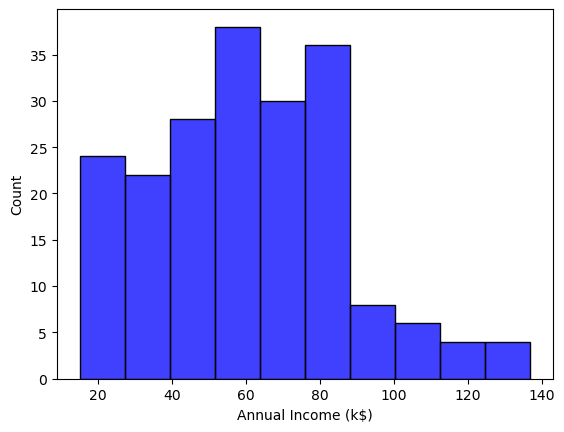

In [7]:
sb.histplot(file['Annual Income (k$)'], color="blue")

<AxesSubplot:xlabel='Annual Income (k$)'>

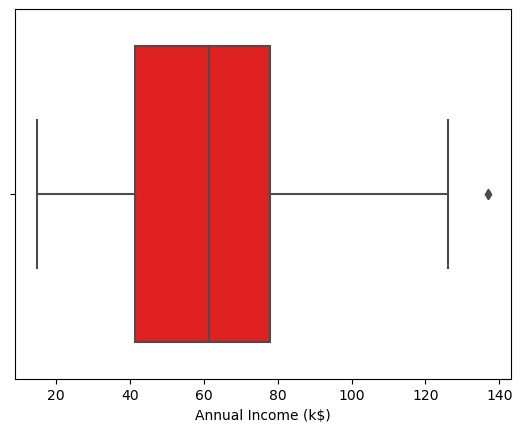

In [8]:
sb.boxplot(file['Annual Income (k$)'], color="red")

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

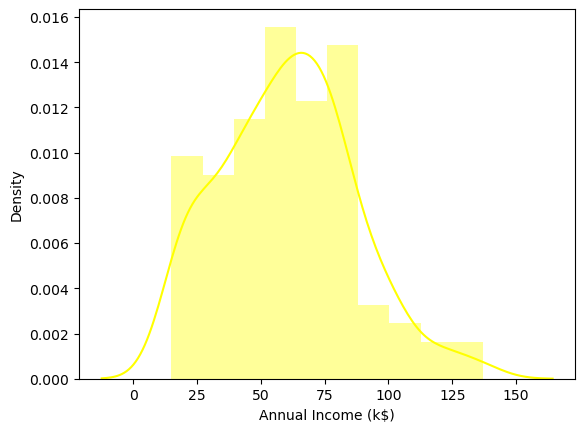

In [10]:
sb.distplot(file['Annual Income (k$)'], color="yellow")

Bi-variate Analysis

<AxesSubplot:xlabel='Age', ylabel='Annual Income (k$)'>

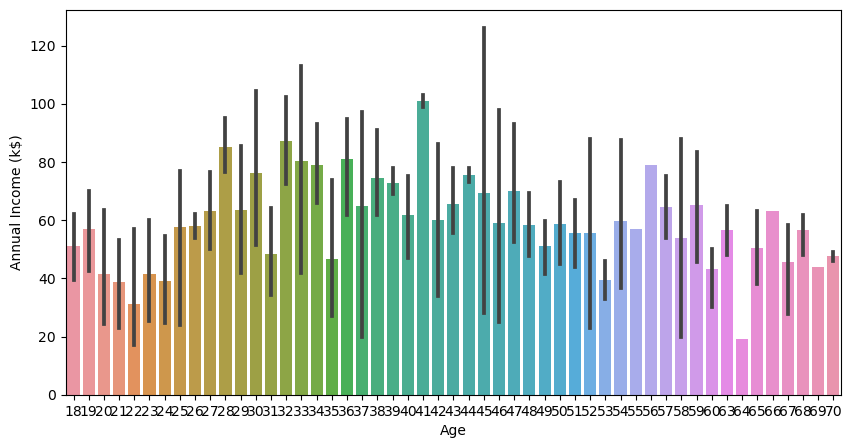

In [11]:
plt.figure(figsize=(10,5))
sb.barplot(file['Age'],file['Annual Income (k$)'])

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

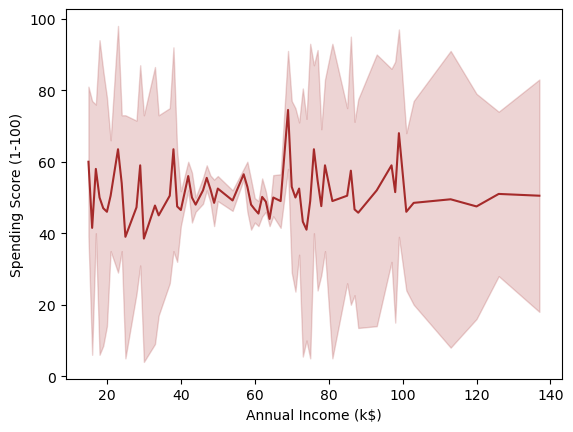

In [13]:
sb.lineplot(file['Annual Income (k$)'], file['Spending Score (1-100)'], color="brown")

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Age'>

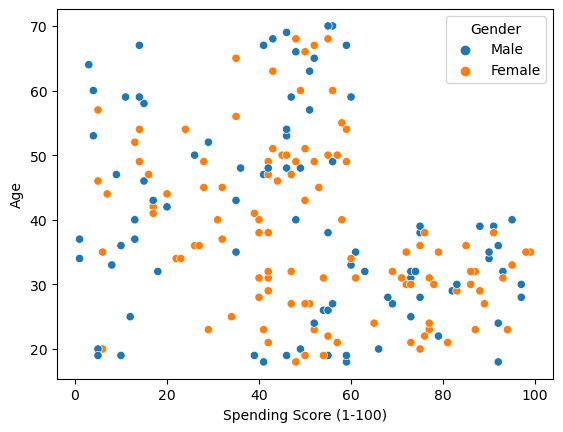

In [15]:
sb.scatterplot(file['Spending Score (1-100)'], file['Age'], hue =file['Gender'])

Multi variate Analysis

<AxesSubplot:>

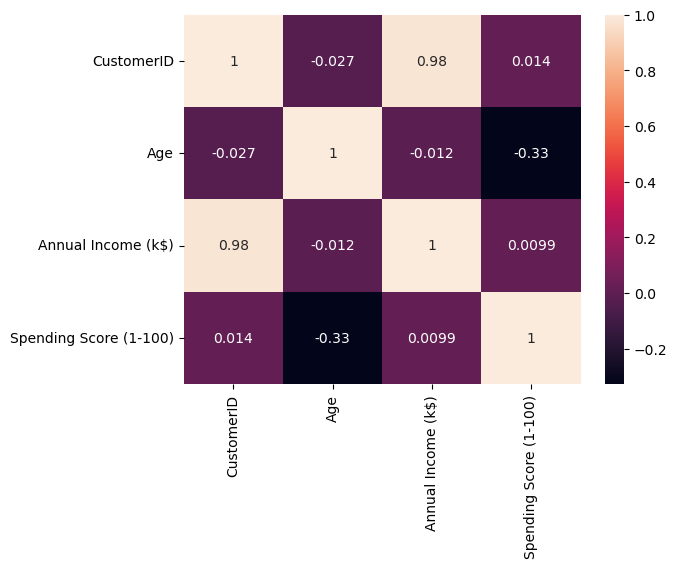

In [16]:
sb.heatmap(file.corr(),annot=True)

Descriptive Statistics Of Datasets

In [19]:
file.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [20]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
file.shape

(200, 5)

Check the missing values and deal with them

In [23]:
file.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

In [24]:
file.drop('CustomerID',axis=1,inplace=True)
file.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


Find the outliers and replace them

In [25]:
for i in file:
    if file[i].dtype=='int64':
        q1=file[i].quantile(0.25)
        q2=file[i].quantile(0.75)
        iqr=q2-q1
        upper=q2+1.5*iqr
        lower=q1-1.5*iqr
        file[i]=np.where(file[i] >upper, upper, file[i])
        file[i]=np.where(file[i] <lower, lower, file[i])

{'whiskers': [<matplotlib.lines.Line2D at 0x1e063b38be0>,
 'caps': [<matplotlib.lines.Line2D at 0x1e063b471c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e063b38910>],
 'medians': [<matplotlib.lines.Line2D at 0x1e063b47760>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e063b47a30>],
 'means': []}

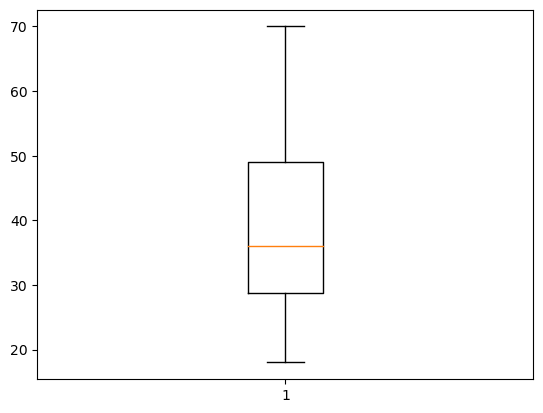

In [31]:
plt.boxplot(file['Age'])


{'whiskers': [<matplotlib.lines.Line2D at 0x1e063ab1a00>,
 'caps': [<matplotlib.lines.Line2D at 0x1e063ab1fa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1e063ab1730>],
 'medians': [<matplotlib.lines.Line2D at 0x1e063abe580>],
 'fliers': [<matplotlib.lines.Line2D at 0x1e063abe850>],
 'means': []}

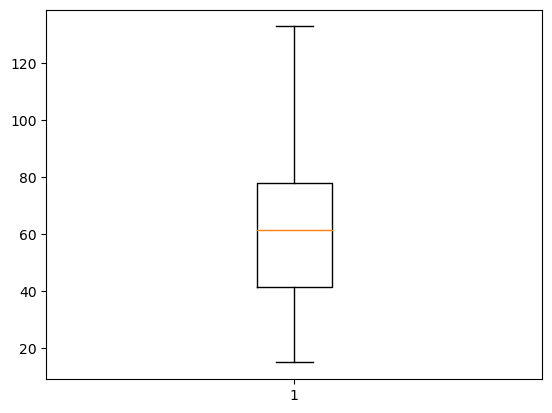

In [27]:
plt.boxplot(file['Annual Income (k$)'])

<AxesSubplot:xlabel='Spending Score (1-100)'>

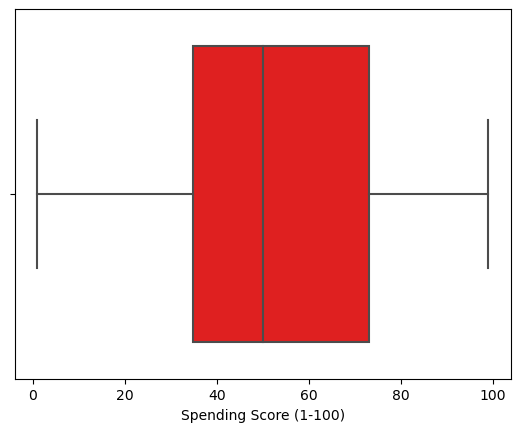

In [33]:
sb.boxplot(file['Spending Score (1-100)'],color="red")

Check the Categorial columns and perform encoding

In [34]:
from sklearn.preprocessing import LabelEncoder
l_en = LabelEncoder()
file['Gender'] = l_en.fit_transform(file['Gender'])
file.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19.0,15.0,39.0
1,1,21.0,15.0,81.0
2,0,20.0,16.0,6.0
3,0,23.0,16.0,77.0
4,0,31.0,17.0,40.0


Scaling the data

In [35]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
file_scaled = scaler.fit_transform(file)
file_scaled[0:5]

array([[1.        , 0.01923077, 0.        , 0.3877551 ],
       [1.        , 0.05769231, 0.        , 0.81632653],
       [0.        , 0.03846154, 0.00849257, 0.05102041],
       [0.        , 0.09615385, 0.00849257, 0.7755102 ],
       [0.        , 0.25      , 0.01698514, 0.39795918]])

Performing K-MEANS clustering algorithm

In [36]:
from sklearn.cluster import KMeans
km = KMeans()
res = km.fit_predict(file_scaled)
res

array([1, 1, 0, 0, 0, 0, 2, 0, 3, 0, 3, 0, 2, 0, 5, 1, 0, 1, 3, 0, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 0, 3, 0, 3, 1, 2, 0, 2, 0, 2, 0, 2, 1, 3, 0,
       2, 0, 2, 0, 0, 0, 2, 1, 0, 3, 2, 3, 2, 3, 0, 3, 3, 1, 2, 2, 3, 1,
       2, 2, 1, 0, 3, 2, 2, 2, 3, 1, 2, 1, 0, 2, 3, 1, 3, 2, 0, 3, 2, 0,
       0, 2, 2, 1, 3, 2, 0, 1, 2, 0, 3, 1, 0, 2, 3, 1, 3, 0, 2, 3, 3, 3,
       3, 0, 6, 1, 0, 0, 2, 2, 2, 2, 1, 6, 4, 7, 6, 4, 5, 7, 3, 7, 5, 7,
       6, 4, 5, 4, 6, 7, 5, 4, 6, 7, 6, 4, 5, 7, 5, 4, 6, 7, 5, 7, 6, 4,
       6, 4, 5, 4, 5, 4, 2, 4, 5, 4, 5, 4, 5, 4, 6, 7, 5, 7, 5, 7, 6, 4,
       5, 7, 5, 7, 6, 4, 5, 4, 6, 7, 6, 7, 6, 4, 6, 4, 5, 4, 6, 4, 6, 7,
       5, 7])

In [38]:
New_File = pd.DataFrame(file_scaled, columns = file.columns)
New_File.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [39]:
New_File['kcluster']  = pd.Series(res)
New_File.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),kcluster
0,1.0,0.019231,0.000000,0.387755,1
1,1.0,0.057692,0.000000,0.816327,1
2,0.0,0.038462,0.008493,0.051020,0
3,0.0,0.096154,0.008493,0.775510,0
4,0.0,0.250000,0.016985,0.397959,0


In [41]:
New_File['kcluster'].unique()

array([1, 0, 2, 3, 5, 6, 4, 7])

In [42]:
New_File['kcluster'].value_counts()

2    37
0    34
3    26
1    24
4    22
5    20
6    19
7    18
Name: kcluster, dtype: int64

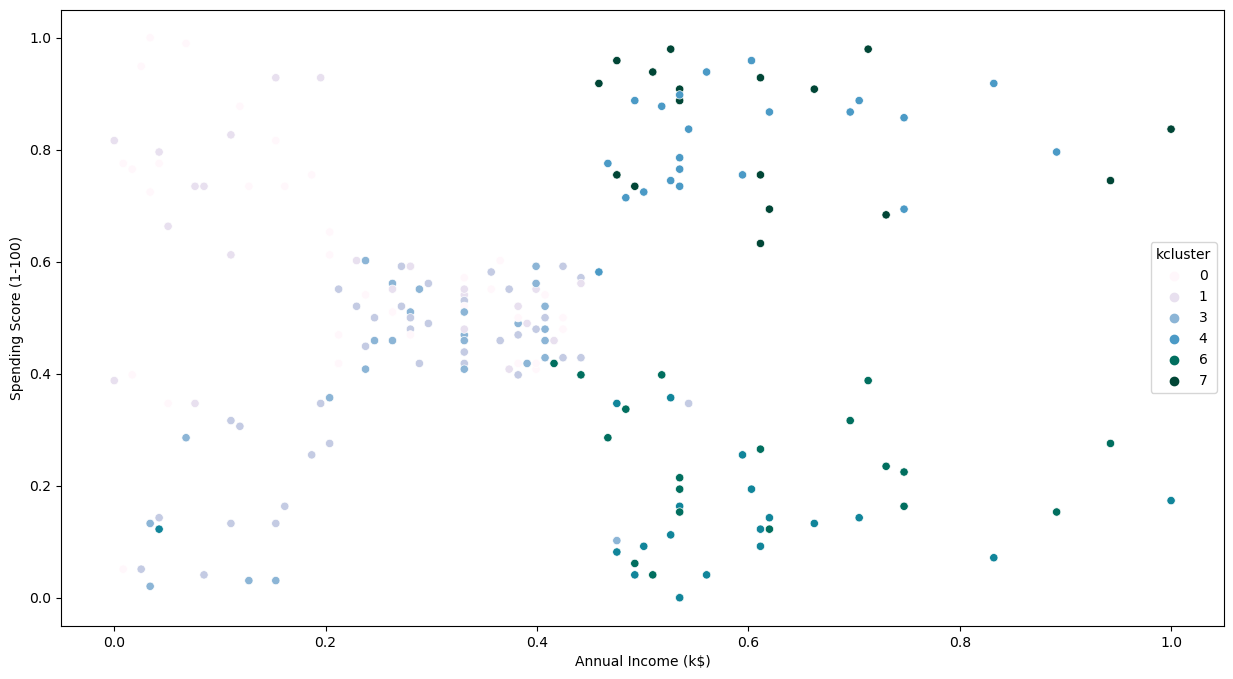

In [43]:
fig,ax = plt.subplots(figsize=(15,8))
sb.scatterplot(x=New_File['Annual Income (k$)'],
                y=New_File['Spending Score (1-100)'],
                hue=New_File['kcluster'],
                palette='PuBuGn')
plt.show()

In [45]:
indep = New_File.iloc[:,0:4]
indep.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.008493,0.051020
3,0.0,0.096154,0.008493,0.775510
4,0.0,0.250000,0.016985,0.397959


In [49]:
dep = New_File.iloc[:,4:]
dep.head()

,kcluster
0,1
1,1
2,0
3,0
4,0


Splitting into train and test data

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(indep,dep,test_size=0.3,random_state=1)

In [52]:
x_train.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
116,0.0,0.865385,0.424628,0.428571
67,0.0,0.961538,0.280255,0.479592
78,0.0,0.096154,0.331210,0.520408
42,1.0,0.576923,0.203822,0.357143
17,1.0,0.038462,0.050955,0.663265


In [53]:
x_test.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
58,0.0,0.173077,0.263270,0.510204
40,0.0,0.903846,0.195329,0.346939
34,0.0,0.596154,0.152866,0.132653
102,1.0,0.942308,0.399151,0.591837
184,0.0,0.442308,0.713376,0.387755


In [54]:
y_train.head()

,kcluster
116,2
67,2
78,0
42,3
17,1


In [56]:
y_test.head()

,kcluster
58,0
40,2
34,2
102,3
184,6


In [57]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [58]:
pred_test = lr.predict(x_test)
pred_test[0:5]

array([[1.37890667],
       [2.00474515],
       [1.18012758],
       [4.54053691],
       [5.11680614]])

Measuring performance using metrices

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import accuracy_score


mse = mean_squared_error(pred_test,y_test)
print("The Mean squared error is: ", mse)


rmse = np.sqrt(mse)
print("The Root mean squared error is: ", rmse)


mae = mean_absolute_error(pred_test,y_test)
print("The Mean absolute error is: ", mae)


acc = lr.score(x_test,y_test)
print("The accuracy is: ", acc)

The Mean squared error is:  2.148187435302089
The Root mean squared error is:  1.4656696201061443
The Mean absolute error is:  1.1709045123777313
The accuracy is:  0.6116953822510787
